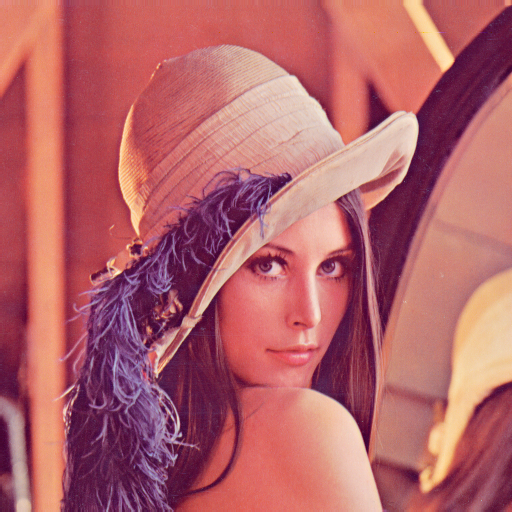

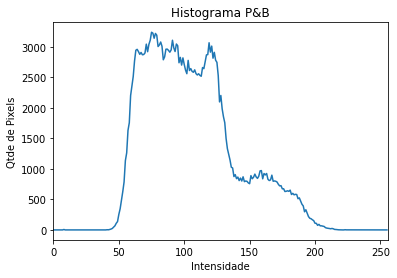

In [20]:
from matplotlib import pyplot as plt
import cv2
import numpy as np
from google.colab.patches import cv2_imshow



img = cv2.imread('lena.png')

#img = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY) #converte P&B
cv2_imshow(img)

#Função calcHist para calcular o hisograma da imagem
h = cv2.calcHist([img], [0], None, [256], [0, 256])
plt.figure()
plt.title("Histograma P&B")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.plot(h)
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)
cv2.destroyAllWindows()

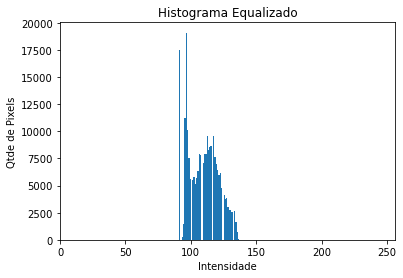

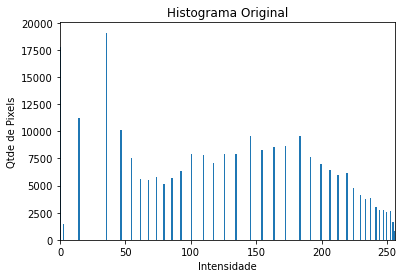

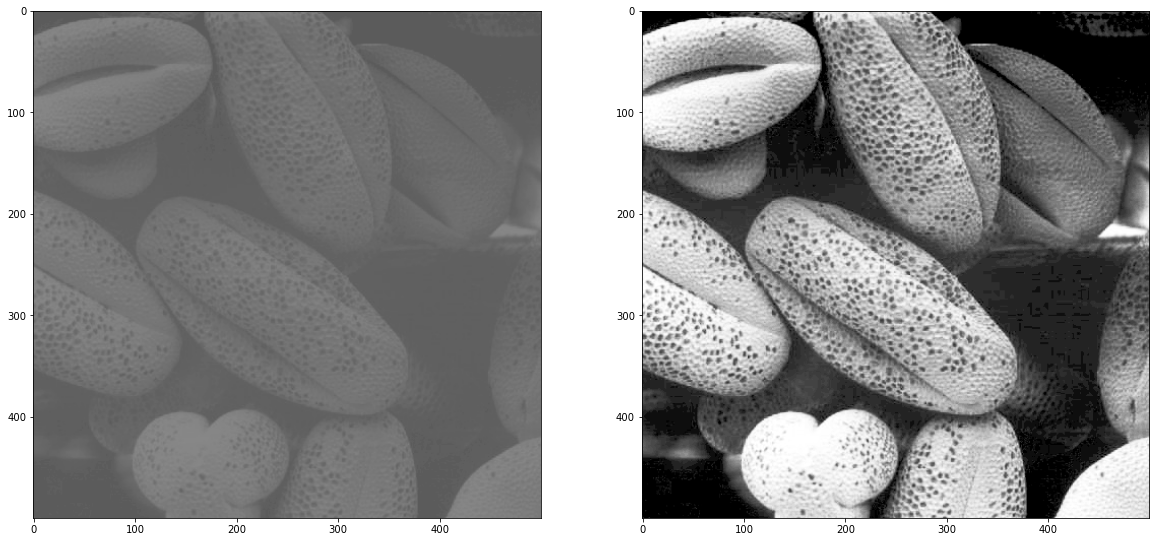

In [ ]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

im1 = cv2.imread('Fig0316.tif')
img = cv2.cvtColor(im1, cv2.COLOR_BGR2GRAY)

#operação de equalização do histograma:
h_eq = cv2.equalizeHist(img)

plt.figure()
plt.title("Histograma Equalizado")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(img.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
plt.figure()
plt.title("Histograma Original")
plt.xlabel("Intensidade")
plt.ylabel("Qtde de Pixels")
plt.hist(h_eq.ravel(), 256, [0,256])
plt.xlim([0, 256])
plt.show()
cv2.waitKey(0)

figure, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(im1, cmap='gray')
axarr[1].imshow(h_eq, cmap='gray')


# Equalising a Color Image Histogram

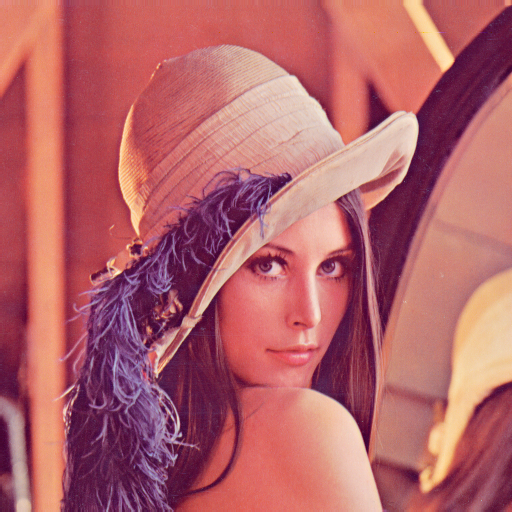

In [32]:
#REF: https://www.freedomvc.com/index.php/2021/09/11/color-image-histograms/
colorimage = cv2.imread("lena.png")
#colorimage = cv2.imread("Fig0316.tif")
cv2_imshow(colorimage)

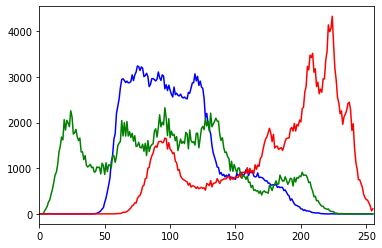

In [39]:
#color = ('r','g','b') #OpenCV follows BGR order, while matplotlib likely follows RGB order
color = ('b','g','r') 

#Loop through each color sequentially
for i,col in enumerate(color):
     
    #To use OpenCV's calcHist function, uncomment below
    histr = cv2.calcHist([colorimage],[i],None,[256],[0,256])
     
    #To use numpy histogram function, uncomment below
    #histr, _ = np.histogram(colorimage[:,:,i],256,[0,256])
 
    plt.plot(histr,color = col)  #Add histogram to our plot 
    plt.xlim([0,256])
     
plt.show()  #Show our plot

In [40]:
# For ease of understanding, we explicitly equalize each channel individually
colorimage_b = cv2.equalizeHist(colorimage[:,:,0])
colorimage_g = cv2.equalizeHist(colorimage[:,:,1])
colorimage_r = cv2.equalizeHist(colorimage[:,:,2])
 
# Next we stack our equalized channels back into a single image
colorimage_e = np.stack((colorimage_b,colorimage_g,colorimage_r), axis=2)
colorimage_e.shape

(512, 512, 3)

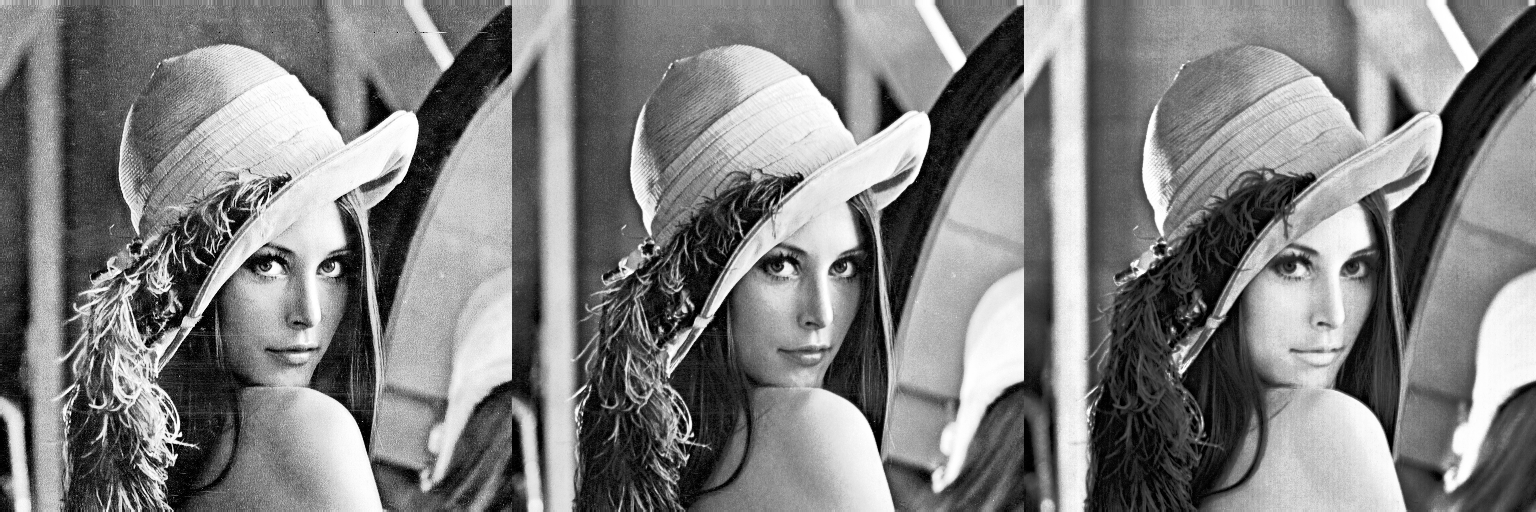

In [42]:
h_img = cv2.hconcat([colorimage_b, colorimage_g, colorimage_r])  #plotar com openCV (hconcat, vconcat)
cv2_imshow(h_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [43]:
colorimage_b

array([[194, 194, 208, ..., 185, 153, 100],
       [194, 194, 208, ..., 185, 153, 100],
       [194, 194, 208, ..., 185, 153, 100],
       ...,
       [ 13,  13,   8, ...,  82,  59,  68],
       [  7,   7,  18, ...,  68,  74,  74],
       [  7,   7,  18, ...,  68,  74,  74]], dtype=uint8)

In [44]:
colorimage_g

array([[196, 196, 196, ..., 211, 182, 131],
       [196, 196, 196, ..., 211, 182, 131],
       [196, 196, 196, ..., 211, 182, 131],
       ...,
       [ 11,  11,  28, ...,  88,  80,  69],
       [ 19,  19,  36, ...,  83,  85,  90],
       [ 19,  19,  36, ...,  83,  85,  90]], dtype=uint8)

In [45]:
colorimage_r

array([[216, 216, 205, ..., 226, 197, 135],
       [216, 216, 205, ..., 226, 197, 135],
       [216, 216, 205, ..., 226, 197, 135],
       ...,
       [  8,   8,  19, ...,  90,  89,  97],
       [  6,   6,  25, ..., 101, 103, 109],
       [  6,   6,  25, ..., 101, 103, 109]], dtype=uint8)

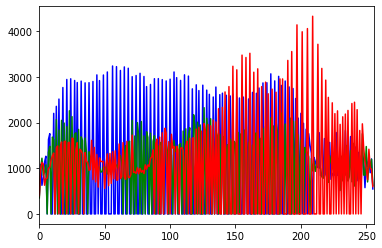

In [12]:
# Using Numpy to calculate the histogram
color = ('b','g','r')
for i,col in enumerate(color):
    histr, _ = np.histogram(colorimage_e[:,:,i],256,[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()


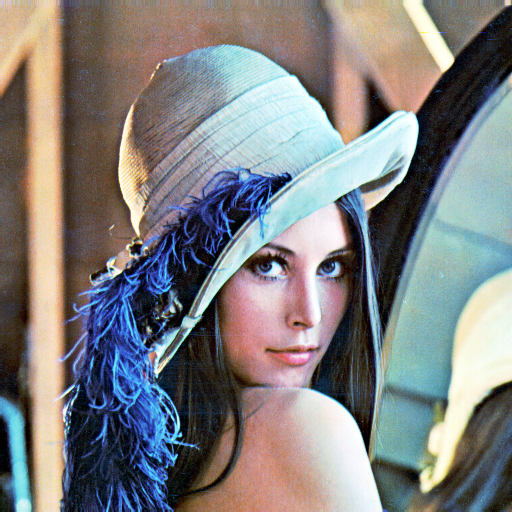

In [37]:
#h_img = cv2.hconcat([colorimage_b, colorimage_g, colorimage_r])  #plotar com openCV (hconcat, vconcat)
cv2_imshow(colorimage_e)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [46]:
colorimage_e

array([[[194, 196, 216],
        [194, 196, 216],
        [208, 196, 205],
        ...,
        [185, 211, 226],
        [153, 182, 197],
        [100, 131, 135]],

       [[194, 196, 216],
        [194, 196, 216],
        [208, 196, 205],
        ...,
        [185, 211, 226],
        [153, 182, 197],
        [100, 131, 135]],

       [[194, 196, 216],
        [194, 196, 216],
        [208, 196, 205],
        ...,
        [185, 211, 226],
        [153, 182, 197],
        [100, 131, 135]],

       ...,

       [[ 13,  11,   8],
        [ 13,  11,   8],
        [  8,  28,  19],
        ...,
        [ 82,  88,  90],
        [ 59,  80,  89],
        [ 68,  69,  97]],

       [[  7,  19,   6],
        [  7,  19,   6],
        [ 18,  36,  25],
        ...,
        [ 68,  83, 101],
        [ 74,  85, 103],
        [ 74,  90, 109]],

       [[  7,  19,   6],
        [  7,  19,   6],
        [ 18,  36,  25],
        ...,
        [ 68,  83, 101],
        [ 74,  85, 103],
        [ 74,  90, 109]]

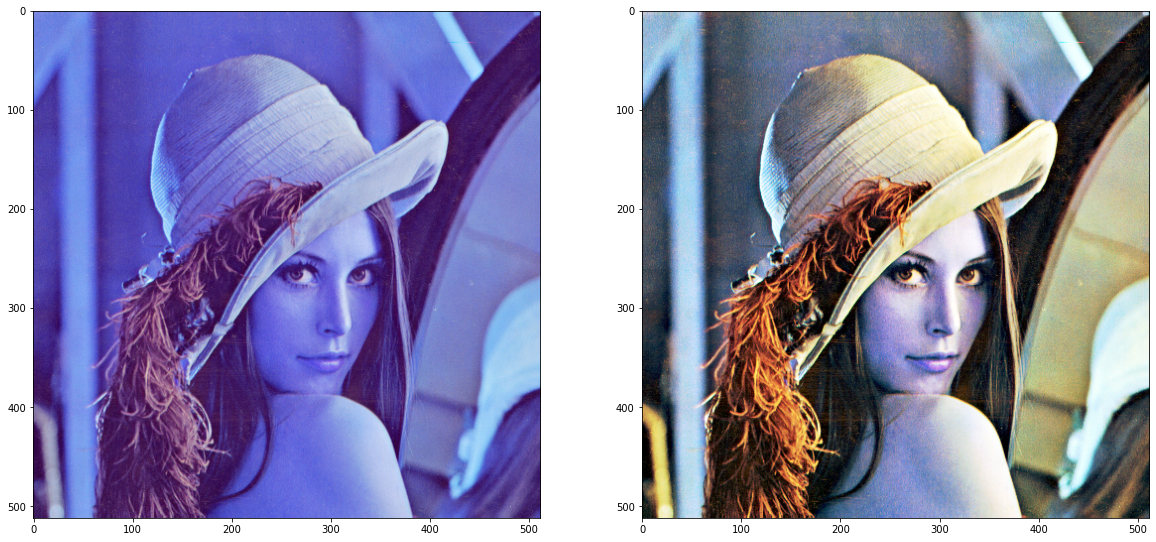

In [13]:
figure, axarr = plt.subplots(1,2, figsize=(20,20))
axarr[0].imshow(colorimage, cmap='gray')
axarr[1].imshow(colorimage_e, cmap='gray')
